<a href="https://colab.research.google.com/github/chiyeon01/Hands_On_Machine_Learning/blob/main/4.%20%EB%AA%A8%EB%8D%B8_%ED%9B%88%EB%A0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 선형 회귀

## 정규 방정식

In [ ]:
import numpy as np

np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1)
y = 4 + 3 * X + np.random.randn(m, 1)

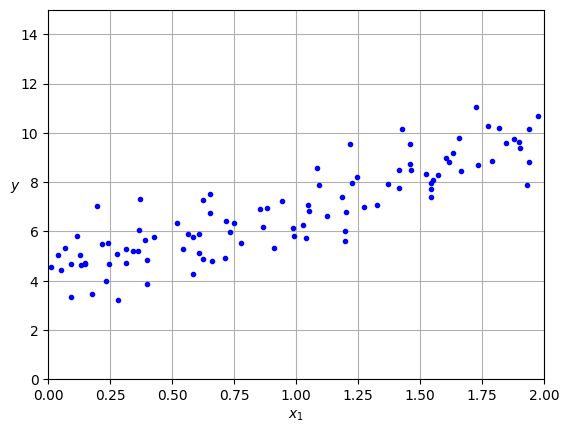

In [ ]:
import matplotlib.pyplot as plt

plt.plot(X, y, "b.")
plt.grid(True)
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.show()

In [ ]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X)
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

In [ ]:
theta_best

array([[4.21509616],
       [2.77011339]])

In [ ]:
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new) # 각 샘플에 x0 = 1을 추가한다.
y_predict = X_new_b @ theta_best
y_predict

array([[4.21509616],
       [9.75532293]])

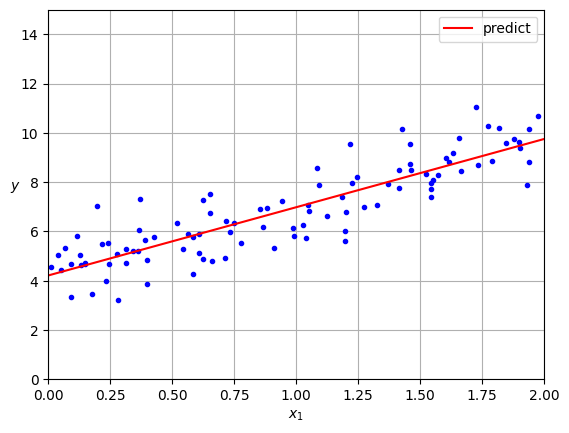

In [ ]:
plt.plot(X, y, "b.")
plt.plot(X_new, y_predict, "r-", label="predict")
plt.grid(True)
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.legend()
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [ ]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

In [ ]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

In [ ]:
np.linalg.pinv(X_b) @ y

array([[4.21509616],
       [2.77011339]])

# 경사 하강법

## 배치 경사 하강법

In [ ]:
eta = 0.1
n_epochs = 1000
m = len(X_b)

np.random.seed(42)
theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    gradients = 2 / m * X_b.T @ (X_b @ theta - y)
    theta = theta - eta * gradients

In [ ]:
theta

array([[4.21509616],
       [2.77011339]])

## 확률적 경사 하강법

In [ ]:
n_epochs = 50
t0, t1 = 5, 50 # 학습 스케줄 하이퍼파라미터

def learning_schedule(t):
    return t0 / (t + t1)

np.random.seed(42)
theta = np.random.randn(2, 1) # 랜덤 초기화

for epoch in range(n_epochs):
    for iteration in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index : random_index+1]
        yi = y[random_index : random_index + 1]
        gradients = 2 * xi.T @ (xi @ theta - yi)
        eta = learning_schedule(epoch * m + iteration)
        theta = theta - eta *gradients

In [ ]:
theta

array([[4.21076011],
       [2.74856079]])

In [ ]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-5, penalty=None, eta0=0.01,
                       n_iter_no_change=100, random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(n_iter_no_change=100, penalty=None, random_state=42, tol=1e-05)

In [ ]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.21278812]), array([2.77270267]))

# 다항 회귀

In [ ]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

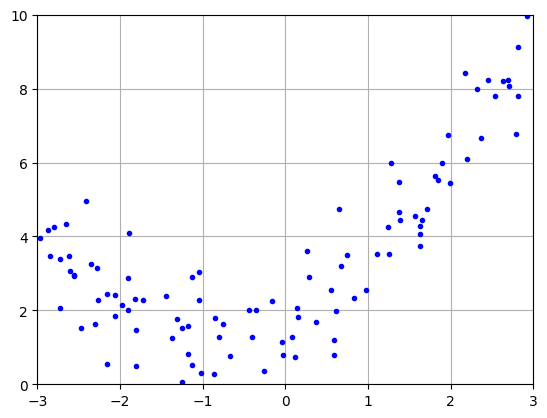

In [ ]:
plt.plot(X, y, "b.")
plt.grid(True)
plt.axis([-3, 3, 0, 10])
plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [ ]:
X[0]

array([-0.75275929])

In [ ]:
X_poly[0]

array([-0.75275929,  0.56664654])

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

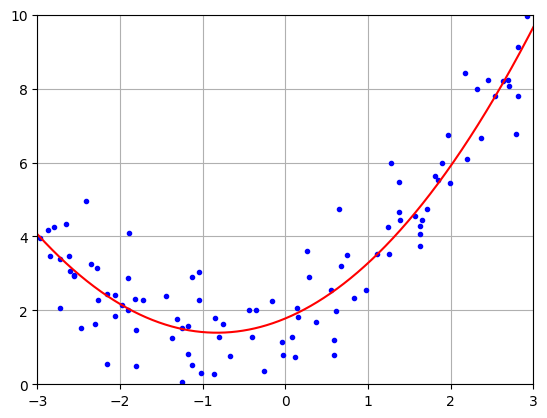

In [ ]:
X_new = np.linspace(-3, 3, 1000).reshape(1000, -1)
X_new_poly = poly_features.fit_transform(X_new)

lin_preds = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, lin_preds, "r-")
plt.grid(True)
plt.axis([-3, 3, 0, 10])
plt.show()

# 학습 곡선

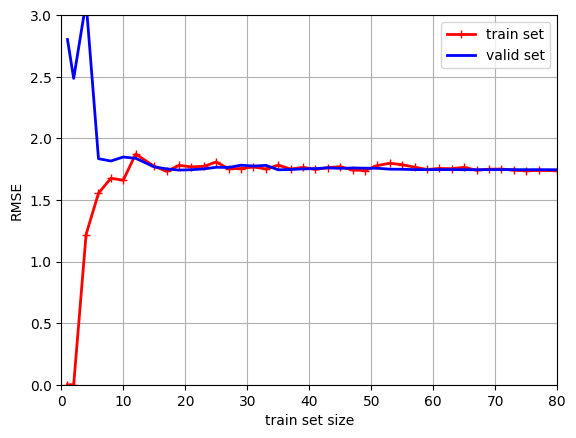

In [ ]:
from sklearn.model_selection import learning_curve

# 과소적합 사례

train_sizes, train_scores, valid_scores = learning_curve(
    LinearRegression(), X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="neg_root_mean_squared_error"
)

train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train set")
plt.plot(train_sizes, valid_errors, "b-", linewidth=2, label="valid set")
plt.xlabel("train set size")
plt.ylabel("RMSE", rotation=90)
plt.grid(True)
plt.legend()
plt.axis([0, 80, 0, 3])
plt.show()

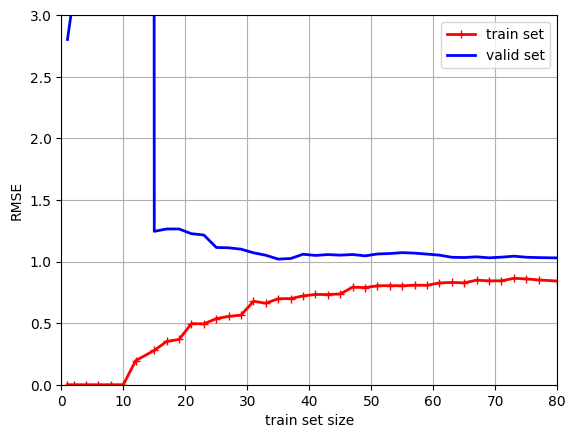

In [ ]:
from sklearn.pipeline import make_pipeline

polynomial_regression = make_pipeline(
    PolynomialFeatures(degree=10, include_bias=False),
    LinearRegression()
)

train_sizes, train_scores, valid_scores = learning_curve(
    polynomial_regression, X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="neg_root_mean_squared_error"
)

train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train set")
plt.plot(train_sizes, valid_errors, "b-", linewidth=2, label="valid set")
plt.xlabel("train set size")
plt.ylabel("RMSE", rotation=90)
plt.grid(True)
plt.legend()
plt.axis([0, 80, 0, 3])
plt.show()

# 규제가 있는 선형 모델

## 릿지 회귀

In [ ]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=0.1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([4.82899748])

In [ ]:
sgd_reg = SGDRegressor(penalty="l2", alpha=0.1 / m, tol=None, max_iter=1000, eta0=0.01, random_state=42)

sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.82830117])

## 라쏘 회귀

In [ ]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([4.77621741])

In [ ]:
sgd_reg = SGDRegressor(penalty="l1", alpha=0.1 / m, tol=None, max_iter=1000, eta0=0.01, random_state=42)

sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.82821838])

## 엘라스틱넷

In [ ]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.78114505])

# 로지스틱 회귀

## 결정 경계

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)

In [ ]:
list(iris)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [ ]:
iris.data.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [ ]:
iris.target.head(3)

,target
0,0
1,0
2,0


In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = iris.data[["petal width (cm)"]].values
y = iris.target_names[iris.target] == "virginica"
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

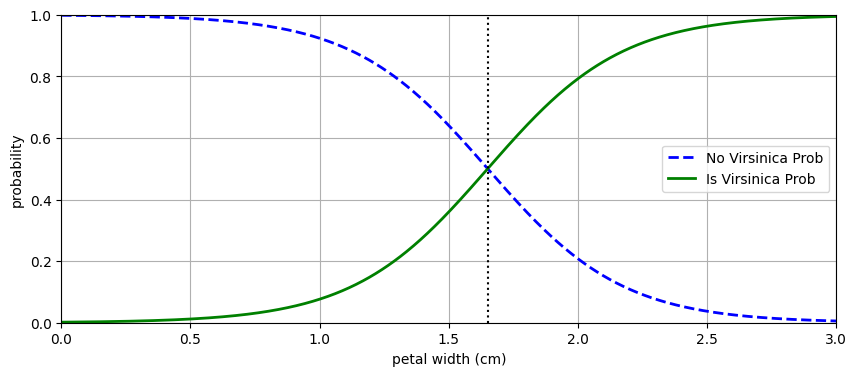

In [ ]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0, 0]

plt.figure(figsize=(10, 4))
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="No Virsinica Prob")
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Is Virsinica Prob")
plt.plot([decision_boundary, decision_boundary], [0, 1], "k:")
plt.axis([0, 3, 0, 1])
plt.grid(True)
plt.legend()
plt.xlabel("petal width (cm)")
plt.ylabel("probability")
plt.show()

In [ ]:
decision_boundary

np.float64(1.6516516516516517)

In [ ]:
log_reg.predict([[1.7], [1.5]])

array([ True, False])

## 소프트맥스 회귀

In [ ]:
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

softmax_reg = LogisticRegression(C=30, random_state=42)
softmax_reg.fit(X_train, y_train)

LogisticRegression(C=30, random_state=42)

In [ ]:
softmax_reg.predict([[5, 2]])

array([2])

In [ ]:
softmax_reg.predict_proba([[5, 2]]).round(2)

array([[0.  , 0.04, 0.96]])